# Data Science Assignment at Elucidata

### Submitted by: Rohan Asthana

#         
## Installing necessary libraries

In [1]:
!pip install cmapPy

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Part 1: Identifying Exocrine tumors and removing Neuroendocrine tumors

Let's first load the data using cmapPy

In [126]:
import cmapPy
from cmapPy import pandasGEXpress
from cmapPy.pandasGEXpress import parse
data_df=collumn_metadf= pandasGEXpress.parse.parse('PAAD.gct',make_multiindex=True)

In [127]:
data_df.col_metadata_df.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [128]:
data=data_df.data_df

In [129]:
data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [130]:
col_data=data_df.col_metadata_df['histological_type_other'].dropna()

In [131]:
neuro=[]
adeno=[]
for items in col_data.iteritems():
    if('adenocarcinoma' in items[1]):
        adeno.append(items[0])
    elif('neuroendocrine' in items[1]):
        neuro.append(items[0])

In [132]:
len(adeno)

15

In [133]:
len(neuro)

8

In [134]:
adenodata=data[adeno]

In [135]:
neurodata=data[neuro]

In [136]:
adenodata

cid,aab1-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal,a45n-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a77e-Primary solid Tumor,a8t5-Primary solid Tumor
rid,,,,,,,,,,,,,,,
SLC35E2,7.45,7.55,8.45,7.85,9.0,7.8,8.0,7.95,8.25,7.8,7.4,7.85,8.05,8.4,8.2
A1BG,6.40,5.70,6.30,4.50,7.2,7.1,5.2,7.90,6.70,6.0,6.4,5.90,6.00,6.7,6.9
A1CF,4.70,6.00,NaN,7.30,-0.6,6.1,8.2,7.40,7.00,3.9,1.2,1.10,3.90,6.0,3.3
A2BP1,-1.00,0.40,-1.50,-0.80,-0.6,1.2,3.2,0.10,0.50,1.8,NaN,4.00,0.80,0.4,2.1
A2LD1,7.50,8.00,5.80,6.30,6.8,6.4,6.3,7.70,6.00,6.6,6.8,7.50,7.30,7.1,6.5
A2ML1,6.40,2.30,10.10,NaN,NaN,2.0,NaN,3.90,NaN,3.6,6.8,12.30,2.50,5.7,3.6
A2M,14.30,13.90,11.90,12.90,13.6,14.5,10.1,14.70,14.00,14.6,14.6,12.80,13.80,13.9,14.3
A4GALT,10.60,8.40,7.90,7.30,8.7,9.0,10.0,8.40,9.50,9.8,10.7,8.00,8.10,10.0,9.1
A4GNT,8.80,4.30,-0.50,4.50,0.4,5.9,NaN,2.10,5.60,6.5,3.4,1.10,4.60,4.0,5.8


## We have thus removed neuroendocrine data so that it contains adenocarcinoma data only

# PCA on full data

Now, We will visualize PCA using sklearn library

In [137]:
import sklearn
import pandas
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data=data.dropna()
principalComponents = pca.fit_transform(data)
principalDf = pandas.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

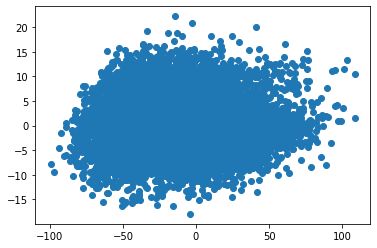

In [138]:
import matplotlib.pyplot as plt
plt.scatter(principalDf['pc1'],principalDf['pc2'])

In [139]:
pca.explained_variance_ratio_

array([0.86152681, 0.02193573])

#### As we can see, the first principal component contains 86.15% of the variance and second principal component contains 2.19% of the variance

#### Together they contain 88.34% of the information (variance)
#### Some information (~11.66%) is lost due to dimensionality reduction



Now we combine neuro and adeno data

In [140]:
neuroadenoid=neuro+adeno

In [141]:
len(neuroadenoid)

23

In [142]:
neuroadenodata=data[neuroadenoid]

In [143]:
neuroadenodata.head()

cid,aaqm-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iv-Primary solid Tumor,aab1-Primary solid Tumor,aabh-Primary solid Tumor,...,a45n-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a77e-Primary solid Tumor,a8t5-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,8.35,8.1,8.7,8.0,7.5,9.95,8.7,7.65,7.45,7.55,...,7.8,8.0,7.95,8.25,7.8,7.4,7.85,8.05,8.4,8.2
A1BG,10.00,9.3,9.5,9.7,8.6,8.00,8.5,9.00,6.40,5.70,...,7.1,5.2,7.90,6.70,6.0,6.4,5.90,6.00,6.7,6.9
A2LD1,6.60,6.3,6.7,5.5,6.4,5.50,3.8,4.40,7.50,8.00,...,6.4,6.3,7.70,6.00,6.6,6.8,7.50,7.30,7.1,6.5
A2M,14.50,12.8,13.9,14.1,12.6,12.00,11.6,12.80,14.30,13.90,...,14.5,10.1,14.70,14.00,14.6,14.6,12.80,13.80,13.9,14.3
A4GALT,9.10,8.9,8.1,9.7,7.0,9.70,7.1,6.60,10.60,8.40,...,9.0,10.0,8.40,9.50,9.8,10.7,8.00,8.10,10.0,9.1


In [144]:
pca_neuroadeno=PCA(n_components=2)
neuroadenodata=neuroadenodata.dropna()
principal_neuroadeno = pca_neuroadeno.fit_transform(neuroadenodata)
principalDf_neuroadeno = pandas.DataFrame(data = principal_neuroadeno
             , columns = ['pc1', 'pc2'])

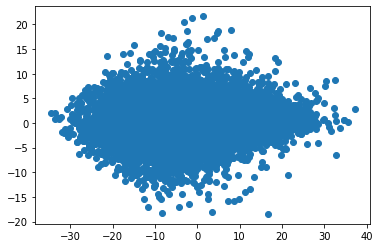

In [145]:
plt.scatter(principalDf_neuroadeno['pc1'],principalDf_neuroadeno['pc2'])

#### Now, we will overlay information of histological_type_other on top of PCA plot

In [146]:
neurodata=neurodata.dropna()
pca_neuro=PCA(n_components=2)
principal_neuro = pca_neuro.fit_transform(neurodata)
principalDf_neuro = pandas.DataFrame(data = principal_neuro
             , columns = ['pc1', 'pc2'])

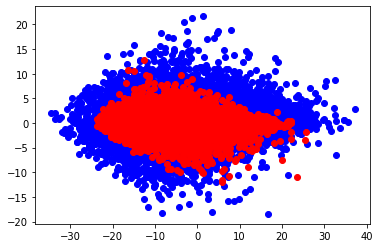

In [147]:
plt.scatter(principalDf_neuroadeno['pc1'],principalDf_neuroadeno['pc2'],c='b')
plt.scatter(principalDf_neuro['pc1'],principalDf_neuro['pc2'],c='r')

### Now we will compare the PCA's of neuroendocrine and adenocarcinoma data

In [148]:
pca_adeno=PCA(n_components=2)
adenodata=adenodata.dropna()
principal_adeno = pca_adeno.fit_transform(adenodata)
principalDf_adeno = pandas.DataFrame(data = principal_adeno
             , columns = ['pc1', 'pc2'])

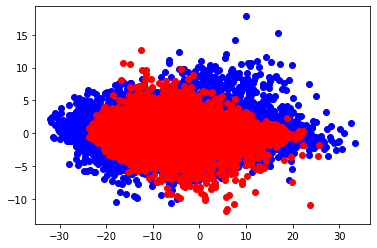

In [149]:
plt.scatter(principalDf_adeno['pc1'],principalDf_adeno['pc2'],c='b')
plt.scatter(principalDf_neuro['pc1'],principalDf_neuro['pc2'],c='r')

### As we can see from the plot, the neuroendocrine tumors are clearly seperable from adenocarcinoma tumors

### Since principal component 2 (y-axis) is not much responsible for the seperation, we can use only one component to seperate the tumors

In [150]:
pca_neuro=PCA(n_components=1)
principal_neuro = pca_neuro.fit_transform(neurodata)
principalDf_neuro = pandas.DataFrame(data = principal_neuro
             , columns = ['pc1'])
pca_neuroadeno=PCA(n_components=1)
principal_neuroadeno = pca_neuroadeno.fit_transform(neuroadenodata)
principalDf_neuroadeno = pandas.DataFrame(data = principal_neuroadeno
             , columns = ['pc1'])
pca_adeno=PCA(n_components=1)
principal_adeno = pca_adeno.fit_transform(adenodata)
principalDf_adeno = pandas.DataFrame(data = principal_adeno
             , columns = ['pc1'])

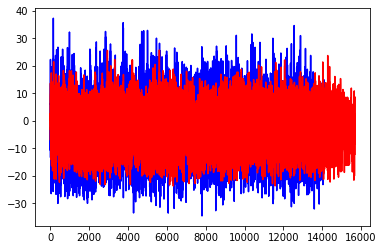

In [151]:
plt.plot(principalDf_neuroadeno['pc1'],c='b')
plt.plot(principalDf_neuro['pc1'],c='r')

In [152]:
print(pca_neuro.explained_variance_ratio_)
print(pca_adeno.explained_variance_ratio_)
print(pca_neuroadeno.explained_variance_ratio_)

[0.85297553]
[0.86261981]
[0.77033647]


### Total 85.29% neuroendocrine variance is contained if one component is used in PCA
### Total 86.26% adenocarcinoma variance is contained if one component is used in PCA
### Total 77.03% neuro+adeno variance is contained if one component is used in PCA

#    
#   
# Part 2: Running GSVA and plotting Gene Expression Values

#### First we load the IFNs from file

In [153]:
f=open('type1_IFN.txt')

In [154]:
ifn=f.read().splitlines()
f.close()

In [155]:
len(ifn)

25

#### Installing libraries

In [156]:
!pip3 install GSVA

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Now, we select rows based on IFN signatures from adenodata

In [157]:
adenodata.head()

cid,aab1-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal,a45n-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a77e-Primary solid Tumor,a8t5-Primary solid Tumor
rid,,,,,,,,,,,,,,,
SLC35E2,7.45,7.55,8.45,7.85,9.0,7.8,8.0,7.95,8.25,7.8,7.4,7.85,8.05,8.4,8.2
A1BG,6.40,5.70,6.30,4.50,7.2,7.1,5.2,7.90,6.70,6.0,6.4,5.90,6.00,6.7,6.9
A2LD1,7.50,8.00,5.80,6.30,6.8,6.4,6.3,7.70,6.00,6.6,6.8,7.50,7.30,7.1,6.5
A2M,14.30,13.90,11.90,12.90,13.6,14.5,10.1,14.70,14.00,14.6,14.6,12.80,13.80,13.9,14.3
A4GALT,10.60,8.40,7.90,7.30,8.7,9.0,10.0,8.40,9.50,9.8,10.7,8.00,8.10,10.0,9.1


In [158]:
ifnadeno= pandas.DataFrame(adenodata.loc[ifn,:])

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [159]:
ifnadeno

cid,aab1-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal,a45n-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a77e-Primary solid Tumor,a8t5-Primary solid Tumor
rid,,,,,,,,,,,,,,,
IFIT1,9.5,8.5,7.2,10.4,10.0,9.2,3.2,9.7,10.1,9.2,9.7,8.6,9.5,10.4,9.4
IFI44,9.4,8.6,7.9,10.5,11.2,9.5,4.1,8.9,10.1,9.2,10.4,8.9,9.8,10.9,9.3
IFIT3,10.0,9.1,9.1,10.8,10.9,9.8,7.3,9.8,10.5,9.3,10.1,8.9,9.5,10.1,9.6
MX2,9.8,9.2,9.2,11.1,11.4,9.2,10.0,8.9,9.8,9.5,10.7,9.2,9.7,10.9,9.7
OAS1,11.7,8.9,7.5,12.0,10.7,10.5,10.5,10.3,11.7,10.0,10.8,8.7,9.4,10.7,9.5
OAS3,11.3,10.1,9.5,12.3,11.4,10.6,10.2,10.6,11.1,9.8,11.7,10.1,10.6,11.7,10.0
BST2,12.2,9.9,10.8,13.2,12.1,11.5,12.0,10.4,11.9,11.1,12.5,10.6,10.3,12.2,12.0
IFITM1,11.2,9.7,10.6,12.7,12.3,11.3,10.5,11.2,11.9,11.2,12.7,9.8,11.2,12.7,12.1
MX1,11.5,10.7,10.4,12.7,12.7,10.9,8.4,10.4,11.8,10.9,12.0,10.4,11.3,12.4,10.8


## Now, plotting gene expression values

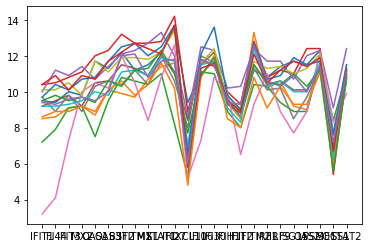

In [160]:
ifnadeno=ifnadeno.dropna()
plt.plot(ifnadeno)

## Running GSVA

In [161]:
from GSVA import gsva,gmt_to_dataframe

In [162]:
expression_df=ifnadeno
geneset_df=pandas.DataFrame(ifn,columns=['member'])

In [163]:
geneset_df['name']='Adenocarcinoma'
geneset_df.to_csv('geneset.csv',index=True)

In [164]:
#genesets_df = gmt_to_dataframe('gs.gmt')
for ind,i in enumerate(geneset_df['name']):
    geneset_df['name'][ind]='adeno'+str(ind)

In [165]:
geneset_df

,member,name
0,IFIT1,adeno0
1,IFI44,adeno1
2,IFIT3,adeno2
3,MX2,adeno3
4,OAS1,adeno4
5,OAS3,adeno5
6,BST2,adeno6
7,IFITM1,adeno7
8,MX1,adeno8
9,STAT1,adeno9


In [166]:
expression_df = pandas.read_csv('expr.csv',index_col=0)
expression_df.iloc[0:5,0:5]

,aab1-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal
rid,,,,,
IFIT1,9.5,8.5,7.2,10.4,10.0
IFI44,9.4,8.6,7.9,10.5,11.2
IFIT3,10.0,9.1,9.1,10.8,10.9
MX2,9.8,9.2,9.2,11.1,11.4
OAS1,11.7,8.9,7.5,12.0,10.7


In [167]:
pathways_df = gsva(expression_df,geneset_df,verbose=1,tempdir='../elucidata/')

Caching to ../elucidata/
WARNING removing 1 genes from gene sets that don't exist in the data
IRGM
Rscript c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\GSVA\gsva.r gsva Gaussian False 1 None 0 SOCK True None True 1 ../elucidata/


UnsupportedOperation: fileno

## As this error did not resolve, I used R to calculate GSVA scores and saved the scores to GSA Scores.csv

In [168]:
scores=pandas.read_csv('GSA Scores.csv',delimiter=' ')

In [169]:
scores

,aab1.Primary.solid.Tumor,aabh.Primary.solid.Tumor,aabi.Primary.solid.Tumor,X6879.Primary.solid.Tumor,a45n.Solid.Tissue.Normal,a45n.Primary.solid.Tumor,X7289.Primary.solid.Tumor,X8519.Primary.solid.Tumor,a4bk.Primary.solid.Tumor,a77p.Primary.solid.Tumor,a77q.Primary.solid.Tumor,a9tj.Metastatic,a9tj.Primary.solid.Tumor,a77e.Primary.solid.Tumor,a8t5.Primary.solid.Tumor
adeno0,-0.391304,-0.304348,-0.391304,0.043478,-0.478261,-0.478261,-0.826087,0.739130,0.478261,0.217391,-0.826087,0.304348,0.391304,0.826087,0.130435
adeno1,-0.565217,-0.217391,-0.130435,-0.391304,0.217391,0.391304,-0.913043,-0.217391,0.130435,0.130435,0.130435,0.913043,0.739130,0.913043,-0.521739
adeno10,0.565217,0.652174,-1.000000,0.739130,-1.000000,-0.913043,0.565217,-0.565217,0.391304,0.652174,0.391304,-0.565217,-0.478261,0.478261,0.043478
adeno11,1.000000,0.304348,0.043478,-0.521739,-0.304348,1.000000,0.130435,0.913043,-0.913043,0.826087,-1.000000,-0.739130,0.826087,-1.000000,-0.478261
adeno12,-0.913043,-0.130435,0.739130,-0.565217,0.304348,0.652174,-1.000000,1.000000,-0.565217,0.913043,0.478261,-0.521739,-0.739130,-0.739130,0.826087
adeno13,-0.652174,0.826087,-0.739130,-0.913043,-0.217391,0.913043,-0.521739,0.130435,0.826087,0.565217,1.000000,1.000000,0.652174,-0.913043,-0.826087
adeno14,-0.478261,0.565217,-0.304348,-0.130435,0.565217,-0.826087,1.000000,0.826087,-0.826087,-0.826087,-0.521739,-0.913043,0.217391,-0.565217,-0.391304
adeno15,-0.826087,0.130435,-0.521739,-0.304348,0.913043,0.217391,-0.652174,0.652174,0.304348,-0.739130,-0.565217,-0.304348,0.565217,-0.304348,1.000000
adeno16,-1.000000,1.000000,-0.217391,-0.217391,-0.739130,-0.565217,-0.391304,-0.521739,-1.000000,1.000000,0.217391,-0.130435,-0.217391,-0.217391,0.913043
adeno17,0.217391,-0.565217,0.565217,-0.652174,0.739130,-0.652174,0.826087,-0.826087,1.000000,-0.565217,-0.652174,-1.000000,-0.521739,-0.652174,0.304348


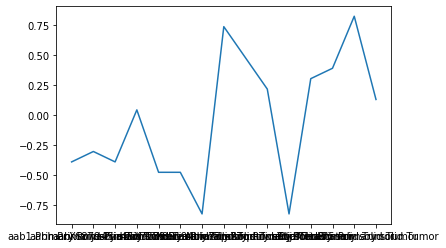

In [170]:
plt.plot(scores.iloc[0])

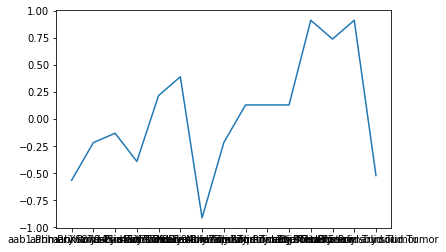

In [171]:
plt.plot(scores.iloc[1])

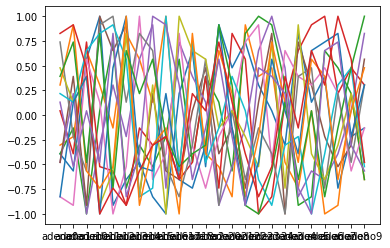

In [172]:
plt.plot(scores)

### Now, we will check the distribution of data using Cumulative Distributive Function and KS Statistic

In [173]:
import numpy as np
num_bins = 20
counts, bin_edges = np.histogram (scores, bins=num_bins, normed=True)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


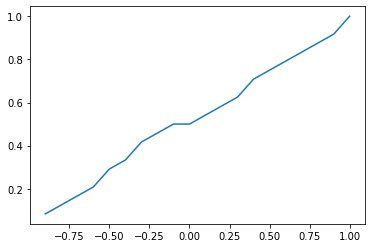

In [174]:
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

## Now, we will check if these scores segregate data into subtypes

In [175]:
pca_scores=PCA(n_components=2)

In [176]:
pca_scores=PCA(n_components=2)
principal_scores = pca_scores.fit_transform(scores)
principalDf_scores = pandas.DataFrame(data = principal_scores
             , columns = ['pc1', 'pc2'])

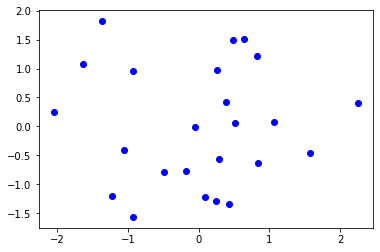

In [177]:
plt.scatter(principalDf_scores['pc1'],principalDf_scores['pc2'],c='b')

In [178]:
from sklearn.cluster import KMeans

In [179]:
kmeans=KMeans(n_clusters=3)

In [180]:
kmeans.fit(principalDf_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [181]:
y_means=kmeans.predict(principalDf_scores)

## As we can see from the plot, the data cannot be segregated into different types after applying PCA